**합성곱 신경망(Convolutional Neural Network)**은 이미지 처리에 탁월한 성능을 보인는 신경망이다. <br>
합성곱 신경망은 **합성곱 층(Convolution layer)**과 **풀링 층(Pooling layer)**으로 구성된다.


## <strong> 1. 합성곱 신경망의 대두 </strong>

이미지 처리를 위해 MLP를 사용할 수 있었지만 한계가 있었다. <br>
아래와 같은 앞파벳 Y는 사람의 입장에서 구분하기 쉽다. <br> 하지만 기계의 입장에서 각 픽셀이 가진 값이 거의 상이하므로 다른 값을 가진 입력이 된다.

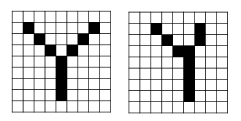

이미지는 위 처럼 **같은 대상이라도 휘어지거나, 이동되는 등 다양한 변형이 존재한다.** <br>
하지만 MLP는 몇 가지 픽셀만 값이 달라져도 민감하게 예측에 영향을 받는다. <br>
MLP는 학습을 위해 **이미지를 1차원 텐서로 변환하여 입력을 받는다.** <br>
위에서 두 번째 y를 1차원 벡터로 풀면 다음과 같다.

image.png

위와 같은 입력은 **공간적인 구조(spatial structure)** 정보가 유실된 상태이다. <br>
공간적인 구조 정보는 거리가 가까운 어떤 픽셀들끼리는 어떤 연관이 있다, 어떤 픽셀들끼리는 값이 비슷하다 등의 정보를 포함한다. <br>
즉, 이미지의 공간적 구조 정보를 보존하면서 학습할 수 있는 방법이 필요했고, 이를 위해 사용하는 것이 합성곱 신경망이다.

## <strong> 2. 채널 </strong>

기계는 글자나 이미지보다 숫자 즉, 텐서를 더 잘 처리한다. <br>
이미지는 **(높이, 너비, 채널)** 총 3차원 텐서이다.

* 높이(height): 세로 방향 픽셀 수
* 너비(width): 가로 방향 픽셀 수
* 채널(channel): 색 성분

흑색 이미지는 채널 수가 1이며 각 픽셀은 0부터 255 사이의 값을 가진다. <br>
컬러 이미지는 채널 수가 3개(R, G, B)이다. <br>
채널을 **깊이(depth)**라고 부르기도 한다.

## <strong> 3. 합성곱 연산 </strong>

합성곱층은 합성곱 연산을 통해 **이미지의 특징을 추출하는 역할**을 한다. <br>
합성곱층에서는 **커널(kernel)** 혹은 **필터(filter)**라고 불리는 $n\times m$크기의 행렬로 이미지를 처음부터 끝까지 겹치며 흝는다. <br>
이때 이미지와 겹쳐지는 이미지의 각 원소를 커널의 원소들과 곱해서 모두 더한 값을 출력으로 만든다.

* 커널(kernel)은 일반적으로 $3\times 3$ 혹은 $5\times 5$를 사용한다.

$
conv\begin{pmatrix}
\begin{pmatrix}
1 \, 2 \, 3 \, 4 \, 5 \\
2 \, 1 \, 0 \, 1 \, 2 \\
3 \, 0 \, 1 \, 1 \, 0 \\
1 \, 4 \, 1 \, 1 \, 2 \\
2 \, 1 \, 1 \, 0 \, 0 
\end{pmatrix} ,
\begin{pmatrix}
1 \, 0 \, 1 \\
1 \, 0 \, 1 \\
0 \, 1 \, 0 
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
6 & 9 & 11 \\
10 & 4 & 4 \\
7 & 7 & 4 
\end{pmatrix}
$

**(1) 첫 번째 스텝**<br>
- 
$
(1\times1) + (2\times0) + (3\times1) +
(2\times1) + (1\times0) + (0\times1) +
(3\times0) + (0\times1) + (1\times0) =
6
$

**(2) 두 번째 스텝**<br>
- 
$
(2\times1) + (3\times0) + (4\times1) +
(1\times1) + (0\times0) + (1\times1) +
(0\times0) + (1\times1) + (1\times0) =
9
$

**(3) 세 번째 스텝**<br>
- 
$
(3\times1) + (4\times0) + (5\times1) +
(0\times1) + (1\times0) + (2\times1) +
(1\times0) + (1\times1) + (0\times0) =
11
$

합성곱은 위와 같은 방식으로 진행되며 이후 6개의 결과값도 동일하게 계산해주면 된다. <br>
위 계산의 결과로 나온 텐서를 **특성 맵(feature map)**이라고 한다.

위에서 커널의 이동 범위는 한 칸이었지만 이는 사용자가 직접 지정할 수 있다. <br>
이러한 이동 범위를 **스트라이드(stride)**라고 한다.

## <strong> 4. 패딩 </strong>

위 예에서 $5\times 5$ 이미지에 $3\times 3$의 커널을 적용하면 $3\times 3$ 특성 맵을 얻을 수 있다. <br>
이와 같이 **합성곱 연산의 결과로 얻은 특성 맵은 입력보다 크기가 작아진다.** <br>
즉, 합성곱 층을 여러 개 쌓게되면 최종적으로 얻은 특성맵의 크기는 매우 작아진다. <br>
합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하고 싶다면 **패딩(padding)**을 사용하면 된다.

패딩은 **합성곱 연산 전에 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가해는 것**을 말한다. <br>
이때 각 행과 열의 원소값에는 주로 0을 채워준다.**(zero padding)**





## <strong> 5. 가중치와 편향 </strong>

<h3> <strong> 5.1 합성곱 신경망의 가중치 </strong> </h3>

MLP로 $3 \times 3$ 이미지를 처리한다고 가정하자. <br>
입력을 위해 해당 이미지를 9차원의 1차원 벡터로 만들어준다. <br>
이때 출력층의 뉴런이 4개라고 하면 총 가중치는 **36(9×4)**개가 될 것이다.

이번에는 합성곱 신경망으로 이미지를 처리한다고 가정하자. <br>
커널의 크기는 2×2 크기, 스트라이드는 1로 가정하자. <br>

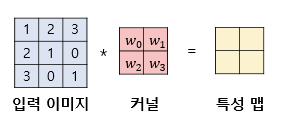

이때 우리가 학습해야할 가중치는 $w_1, w_2, w_3, w_4$ 즉, 커널의 원소 밖에 없다. <br>
또한 합성곱 연산마다 이미지의 모든 픽셀을 사용하는 것이 아니라, 커널과 맵핑되는 픽셀만을 사용한다. <br>
이처럼 **합성곱 신경망은 MLP에 비해 훨씬 적은 수의 가중치를 사용하여 공간적 구조 정보를 보존한다.**

합성곱 신경망의 은닉층은 MLP와 동일하게 비성형성 추가를 위해 활성화 함수를 사용한다. <br>
일반적으로 렐루 혹은 그 변형을 사용한다.

위처럼 합성곱 연산을 통해 특성 맵을 얻고, 활성화 함수를 지나는 연산을 하는 합성곱 신경망의 은닉층을 **합성곱 층(convolution layer)**라고 한다.

<h3> <strong> 5.2 합성곱 신경망의 편향 </strong> </h3>

편향을 사용하게 되면 **커널을 적용한 뒤에 더해진다.** <br>
편향은 **하나의 값만 존재하며 커널이 적용된 결과의 모든 원소에 더해진다.**

## <strong> 6. 특성 맵의 크기 계산 방법 </strong>

입력의 크기와 커널의 크기, 스트라이드의 값만 알면 특성 맵의 크기를 계산할 수 있다.

$O_h=floor(\frac{I_h-K_h}{S}+1)$

$O_w=floor(\frac{I_w-K_w}{S}+1)$

**floor() 함수는 소수점 발생시 소수점 이하를 버리는 역할을 한다.** <br>
패딩을 고려한 경우 식은 다음과 같다. (P: 패딩 폭)

$O_h=floor(\frac{I_h-K_h+2P}{S}+1)$

$O_w=floor(\frac{I_w-K_w+2P}{S}+1)$


## <strong> 7. 다수 채널을 가질 경우 합성곱 연산 </strong>

입력 데이터가 다수의 채널을 가지고 있다면 **커널의 채널 수는 입력의 채널 수 만큼 존재해야 한다.** <br>
채널 수가 같으므로 합성곱 연산을 채널마다 수행한다. <br>
그리고 그 결과를 모두 더해 최종 특성 맵을 얻는다.

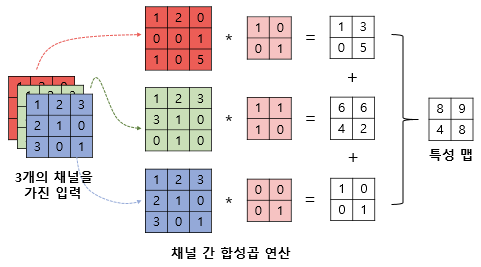

위에서 중요한 점은 위의 **연산에 사용되는 커널은 3개가 아니라 3개의 채널을 가진 1개의 커널이라는 것이다.**

## <strong> 8. 3차원 텐서의 합성곱 연산 </strong>

합성곱 연산에서 다수의 커널을 사용할 경우 가중치 매개변수의 총 수는 다음과 같다.

$가중치 \, 매개변수 \, 총 \, 수: K_h \times K_w \times C_i \times C_o = (커널의 \, 높이) \times (커널의 \, 너비) \times (입력 \, 채널) \times (출력 \, 채널)$

## <strong> 9. 폴링 </strong>

일반적으로 합성곱 층 다음에는 폴링 층을 추가하는 것이 일반적이다. <br>
폴링 층에서는 특성 맵을 다운 샘플링하여 특성 맵의 크기를 줄이는 **풀링 연산**이 이루어진다. <br>
폴링 연산에는 일반적으로 **최대 풀링(max pooling)**과 **평균 풀링(average pooling)**이 사용된다.

풀링 연산에서도 커널과 스트라이드가 사용된다. <br>
단, 학습할 가중치가 없으며 연산 후에도 채널 수는 변하지 않는다.

출처: https://wikidocs.net/62306